# **Integrated Supplier Performance and Predictive Inventory Management**

 **1. Loading the Dataset**

In [ ]:
install.packages("caret", dependencies = TRUE)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘R.methodsS3’, ‘R.oo’, ‘R.utils’, ‘bitops’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘later’, ‘promises’, ‘R.cache’, ‘caTools’, ‘TH.data’, ‘profileModel’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘plotrix’, ‘diagram’, ‘lava’, ‘shiny’, ‘miniUI’, ‘styler’, ‘classInt’, ‘labelled’, ‘gplots’, ‘libcoin’, ‘matrixStats’, ‘multcomp’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘timeDate’, ‘brglm’, ‘gtools’, ‘lme4’, ‘qvcalc’, ‘rex’, ‘Formula’, ‘plotmo’, ‘prodlim’, ‘combinat’, ‘questionr’, ‘ROCR’, ‘mvtnorm’, ‘modeltools’, ‘strucchange’, ‘coin’, ‘zoo’, ‘sandwich’, ‘ISwR’, ‘corpcor’, ‘ROSE’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’, ‘BradleyTerry2’, ‘covr’, ‘Cubist’, ‘earth’, ‘ellipse’, ‘fastICA’, ‘gam’, ‘ipred’, ‘kernlab’, ‘klaR’, ‘mda’, ‘mlbe

In [ ]:
# Loading necessary libraries
library(tidyverse)  # For data manipulation and visualization
library(lubridate)  # For date-time manipulation
library(ggplot2)    # For plotting
library(randomForest)

# Assuming 'sales_data' is your dataset loaded from CSV
sales_data <- read.csv("Warehouse_and_Retail_Sales.csv")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




**2. Predicting Stockout Events**

[1] "YEAR"             "MONTH"            "SUPPLIER"         "ITEM.CODE"       
[5] "ITEM.DESCRIPTION" "ITEM.TYPE"        "RETAIL.SALES"     "RETAIL.TRANSFERS"
[9] "WAREHOUSE.SALES" 
  YEAR MONTH                          SUPPLIER ITEM.CODE
1 2020     1 REPUBLIC NATIONAL DISTRIBUTING CO    100009
2 2020     1                         PWSWN INC    100024
3 2020     1           RELIABLE CHURCHILL LLLP      1001
4 2020     1         LANTERNA DISTRIBUTORS INC    100145
5 2020     1              DIONYSOS IMPORTS INC    100293
6 2020     1           KYSELA PERE ET FILS LTD    100641
                     ITEM.DESCRIPTION ITEM.TYPE RETAIL.SALES RETAIL.TRANSFERS
1                 BOOTLEG RED - 750ML      WINE         0.00                0
2           MOMENT DE PLAISIR - 750ML      WINE         0.00                1
3 S SMITH ORGANIC PEAR CIDER - 18.7OZ      BEER         0.00                0
4       SCHLINK HAUS KABINETT - 750ML      WINE         0.00                0
5      SANTORINI GAVALA WHIT


Call:
glm(formula = Stockout ~ Total_Sales + Total_Transfers, family = binomial, 
    data = monthly_summary)

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)      2.557e+01  4.346e+05       0        1
Total_Sales      1.691e-11  1.285e+00       0        1
Total_Transfers -9.591e-11  5.058e+00       0        1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 0.0000e+00  on 21  degrees of freedom
Residual deviance: 3.4694e-10  on 19  degrees of freedom
  (2 observations deleted due to missingness)
AIC: 6

Number of Fisher Scoring iterations: 24


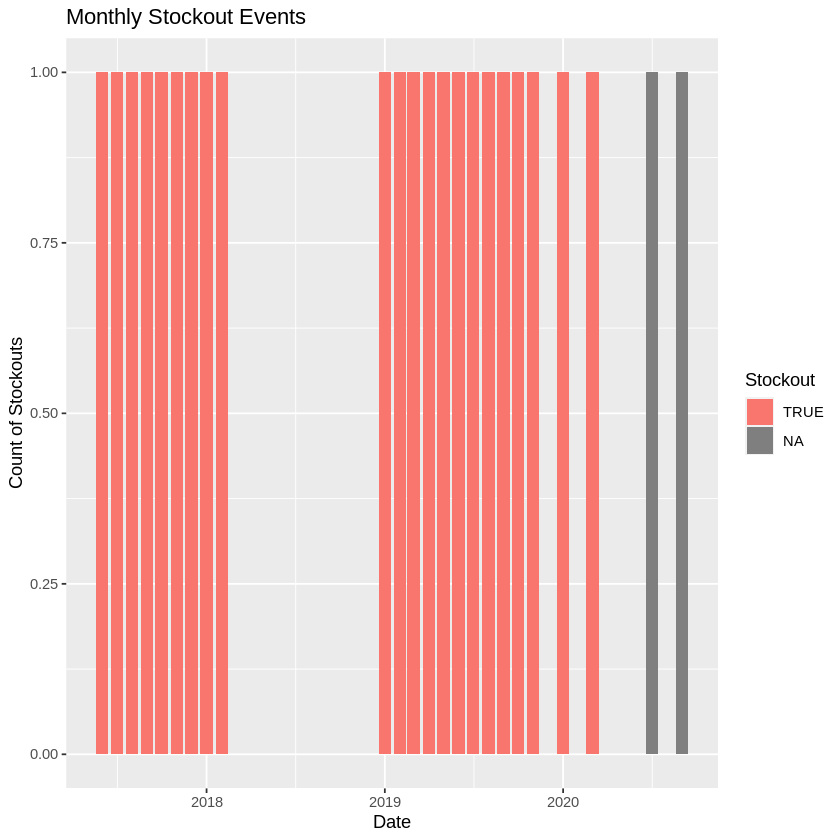

In [ ]:
# Checking the names and head of the dataset
print(names(sales_data))
print(head(sales_data))

# Creating a Date column from YEAR and MONTH
sales_data$Date <- make_date(sales_data$YEAR, sales_data$MONTH)

# Ensuring to use the correct column names as per your CSV
selected_data <- sales_data %>%
  select(Date, `RETAIL.SALES`, `WAREHOUSE.SALES`, `RETAIL.TRANSFERS`)

# Calculating monthly sales and transfers
monthly_summary <- selected_data %>%
  group_by(Date) %>%
  summarise(Total_Sales = sum(`RETAIL.SALES` + `WAREHOUSE.SALES`),
            Total_Transfers = sum(`RETAIL.TRANSFERS`),
            Stockout = Total_Sales > Total_Transfers)

# Plotting monthly stockout rates
ggplot(monthly_summary, aes(x = Date, fill = Stockout)) +
  geom_bar(stat = "count") +
  labs(title = "Monthly Stockout Events", x = "Date", y = "Count of Stockouts")

# Logistic Regression to predict stockouts
logistic_model <- glm(Stockout ~ Total_Sales + Total_Transfers, family = binomial, data = monthly_summary)
summary(logistic_model)


**3. Supplier Reliability Impact**

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1961 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 1961 rows containing missing values (`geom_point()`).”



	Pearson's product-moment correlation

data:  sales_data$Reliability_Score and sales_data$RETAIL.SALES
t = 82.034, df = 305682, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1432966 0.1502338
sample estimates:
     cor 
0.146767 



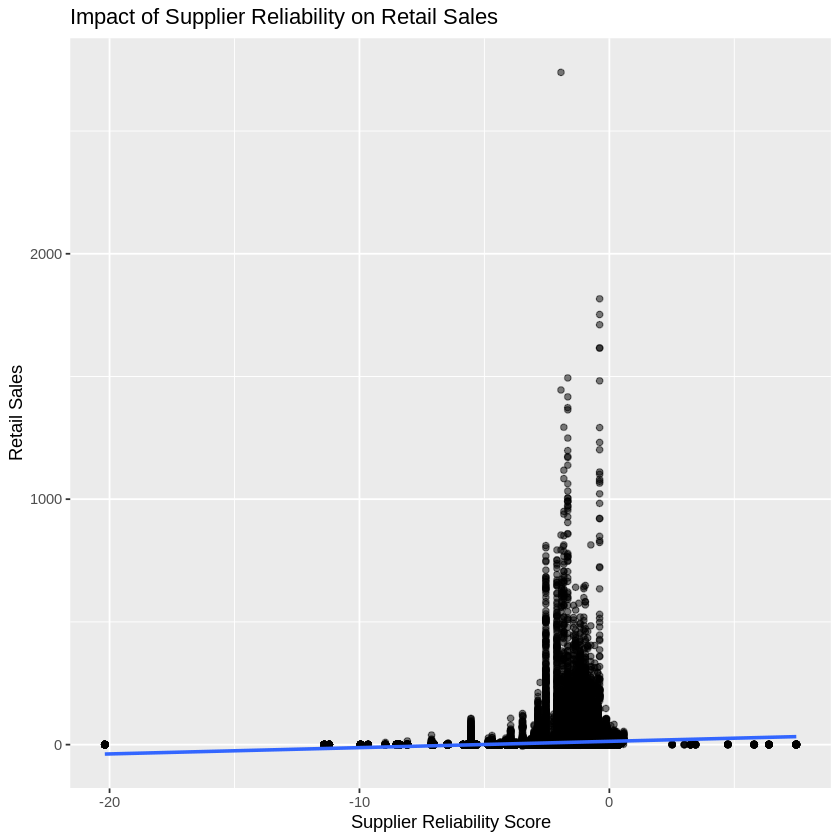

In [ ]:
# Calculating a simple reliability score for each supplier
# Assuming more consistent RETAIL.TRANSFERS implies higher reliability
supplier_reliability <- sales_data %>%
  group_by(SUPPLIER) %>%
  summarise(Average_Transfers = mean(RETAIL.TRANSFERS),
            SD_Transfers = sd(RETAIL.TRANSFERS),
            Reliability_Score = 1 - (SD_Transfers / Average_Transfers),
            .groups = 'drop')

# Merging this reliability score back into the main dataset
sales_data <- left_join(sales_data, supplier_reliability, by = "SUPPLIER")

# Plotting the relationship between supplier reliability and sales
ggplot(sales_data, aes(x = Reliability_Score, y = RETAIL.SALES)) +
  geom_point(alpha = 0.5) +
  geom_smooth(method = "lm") +
  labs(title = "Impact of Supplier Reliability on Retail Sales",
       x = "Supplier Reliability Score", y = "Retail Sales")

# Correlation analysis
cor_test <- cor.test(sales_data$Reliability_Score, sales_data$RETAIL.SALES, method = "pearson")
print(cor_test)


**4. Seasonal and Event Demand**

Warning message:
“Removed 3 rows containing non-finite values (`stat_boxplot()`).”


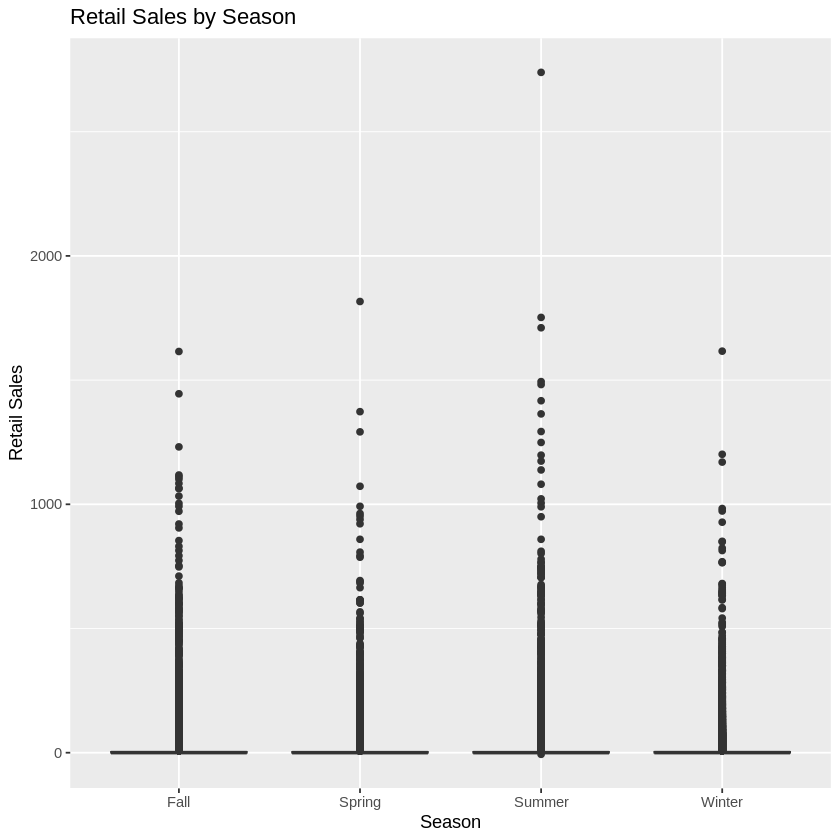

In [ ]:
# Extracting month and creating a 'season' factor
sales_data$Month <- month(sales_data$Date, label = TRUE)
sales_data$Season <- case_when(
  sales_data$Month %in% c("Dec", "Jan", "Feb") ~ "Winter",
  sales_data$Month %in% c("Mar", "Apr", "May") ~ "Spring",
  sales_data$Month %in% c("Jun", "Jul", "Aug") ~ "Summer",
  sales_data$Month %in% c("Sep", "Oct", "Nov") ~ "Fall",
  TRUE ~ "Unknown"
)

# Plotting sales by season
ggplot(sales_data, aes(x = Season, y = RETAIL.SALES)) +
  geom_boxplot() +
  labs(title = "Retail Sales by Season", x = "Season", y = "Retail Sales")

# Adjusting for possible other events would require event data


**5. Predictive Modeling for Retail Stockouts**

In [34]:
# Check the number of observations
nrow(monthly_summary)

# Check the balance between classes
table(monthly_summary$Stockout)


[1] 24


0 1 
0 0 

In [35]:
# Assuming sales_data is the full dataset and monthly_summary was just an aggregation
# Check if any outliers in sales or transfers could indicate stock issues

# Basic outlier detection in Retail Sales
quantiles <- quantile(sales_data$RETAIL.SALES, probs = c(0.25, 0.75))
iqr <- quantiles[2] - quantiles[1]
outlier_threshold_high <- quantiles[2] + 1.5 * iqr

# Flag potential stockout anomalies
sales_data$potential_stockout <- sales_data$RETAIL.SALES > outlier_threshold_high

# Summary of potential stockouts
summary(sales_data$potential_stockout)

# This won't directly solve the classification problem but might help identify unusual patterns
# that could be akin to stockouts under current definitions


   Mode   FALSE    TRUE 
logical  259629   48013 

In [36]:
# Calculate IQR for Retail Sales
Q1 <- quantile(sales_data$RETAIL.SALES, 0.25, na.rm = TRUE)
Q3 <- quantile(sales_data$RETAIL.SALES, 0.75, na.rm = TRUE)
IQR <- Q3 - Q1

# Define upper boundary as potential stockout indicator
upper_bound <- Q3 + 1.5 * IQR

# Flag potential stockout situations
sales_data$potential_stockout <- ifelse(sales_data$RETAIL.SALES > upper_bound, 1, 0)

# Review how many potential stockouts are flagged
table(sales_data$potential_stockout)



     0      1 
259629  48013 

In [37]:
# Analyze the characteristics of potential stockouts
potential_stockouts <- sales_data[sales_data$potential_stockout == 1, ]
summary(potential_stockouts)


      YEAR          MONTH          SUPPLIER          ITEM.CODE        
 Min.   :2017   Min.   : 1.000   Length:48013       Length:48013      
 1st Qu.:2017   1st Qu.: 3.000   Class :character   Class :character  
 Median :2019   Median : 7.000   Mode  :character   Mode  :character  
 Mean   :2018   Mean   : 6.565                                        
 3rd Qu.:2019   3rd Qu.: 9.000                                        
 Max.   :2020   Max.   :12.000                                        
                                                                      
 ITEM.DESCRIPTION    ITEM.TYPE          RETAIL.SALES     RETAIL.TRANSFERS 
 Length:48013       Length:48013       Min.   :   8.17   Min.   : -23.00  
 Class :character   Class :character   1st Qu.:  12.60   1st Qu.:  12.00  
 Mode  :character   Mode  :character   Median :  20.75   Median :  21.00  
                                       Mean   :  39.68   Mean   :  39.01  
                                       3rd Qu.:  40.08   

In [40]:
# Make sure there are no NAs and recalculate the moving average if used
sales_data$ma_retail_sales <- stats::filter(sales_data$RETAIL.SALES, rep(1/7, 7), sides = 1, circular = TRUE)  # Assuming circular for no NA at start/end

# Remove rows with NA values if any in the dataset after calculating moving average or other operations
sales_data <- sales_data[complete.cases(sales_data), ]

# Re-prepare the data for modeling ensuring all rows align
x <- model.matrix(~ RETAIL.SALES + WAREHOUSE.SALES + RETAIL.TRANSFERS + ma_retail_sales - 1, data = sales_data)
y <- as.factor(sales_data$potential_stockout)  # Ensure this is a factor for logistic regression

# Check dimensions to ensure alignment
print(dim(x))
print(length(y))


[1] 305684      4
[1] 305684


In [41]:
# Fit logistic regression model
logistic_model <- glm(y ~ x - 1, family = binomial())  # -1 to exclude intercept if already in x

# Summarize the model to check for significance of predictors
summary(logistic_model)


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = y ~ x - 1, family = binomial())

Coefficients:
                    Estimate Std. Error  z value Pr(>|z|)    
xRETAIL.SALES      2.498e-01  2.000e-03  124.897   <2e-16 ***
xWAREHOUSE.SALES  -1.130e-03  6.237e-05  -18.117   <2e-16 ***
xRETAIL.TRANSFERS -5.971e-04  1.372e-03   -0.435    0.663    
xma_retail_sales  -1.963e-01  1.114e-03 -176.224   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 423768  on 305684  degrees of freedom
Residual deviance: 326523  on 305680  degrees of freedom
AIC: 326531

Number of Fisher Scoring iterations: 8


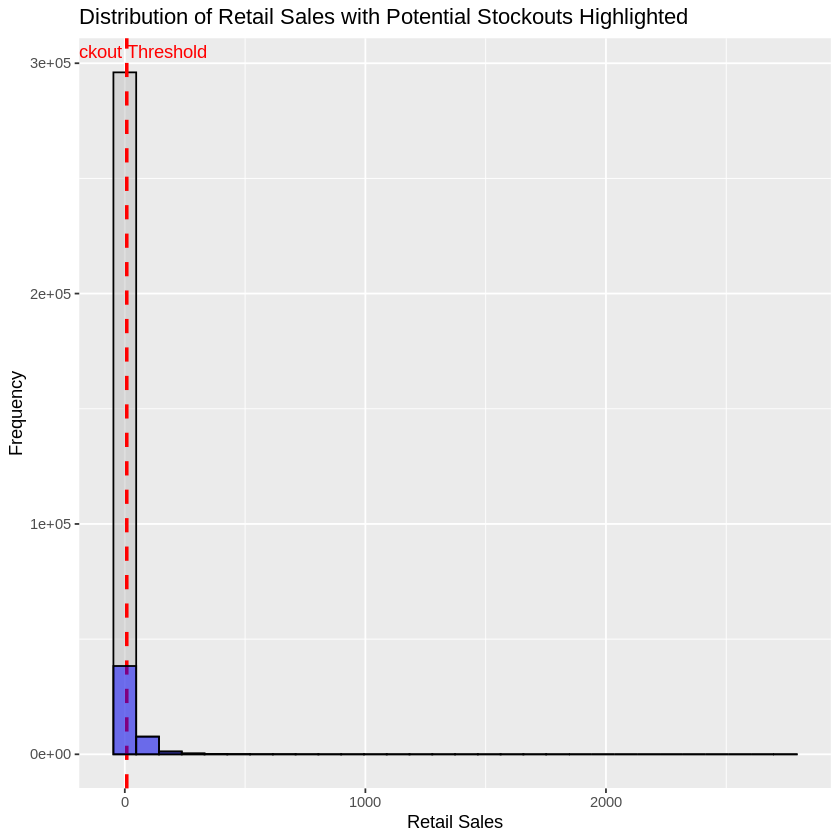

In [44]:
#1. Visualizing Retail Sales and Identified Outliers
# Plotting retail sales with highlighted potential stockouts
ggplot(sales_data, aes(x = RETAIL.SALES)) +
  geom_histogram(bins = 30, fill = "gray", alpha = 0.5, color = "black") +
  geom_vline(xintercept = upper_bound, color = "red", linetype = "dashed", size = 1) +
  geom_histogram(data = subset(sales_data, potential_stockout == 1),
                 bins = 30, fill = "blue", alpha = 0.5, color = "black") +
  labs(title = "Distribution of Retail Sales with Potential Stockouts Highlighted",
       x = "Retail Sales",
       y = "Frequency") +
  annotate("text", x = upper_bound, y = Inf, label = " Stockout Threshold", vjust = 1.5, color = "red")
